#Import library yang di butuhkan

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import tree
import pickle

#Import Dataset Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daffafauzi","key":"486e418b40f0d78eadb21d1a5a75f55e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 4.52MB/s]


In [ ]:
!unzip drugs-a-b-c-x-y-for-decision-trees.zip -d dises
!ls dises

Archive:  drugs-a-b-c-x-y-for-decision-trees.zip
  inflating: dises/drug200.csv       
drug200.csv


#Data Discovery

In [ ]:
data = pd.read_csv("/content/dises/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.shape

(200, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


#EDA

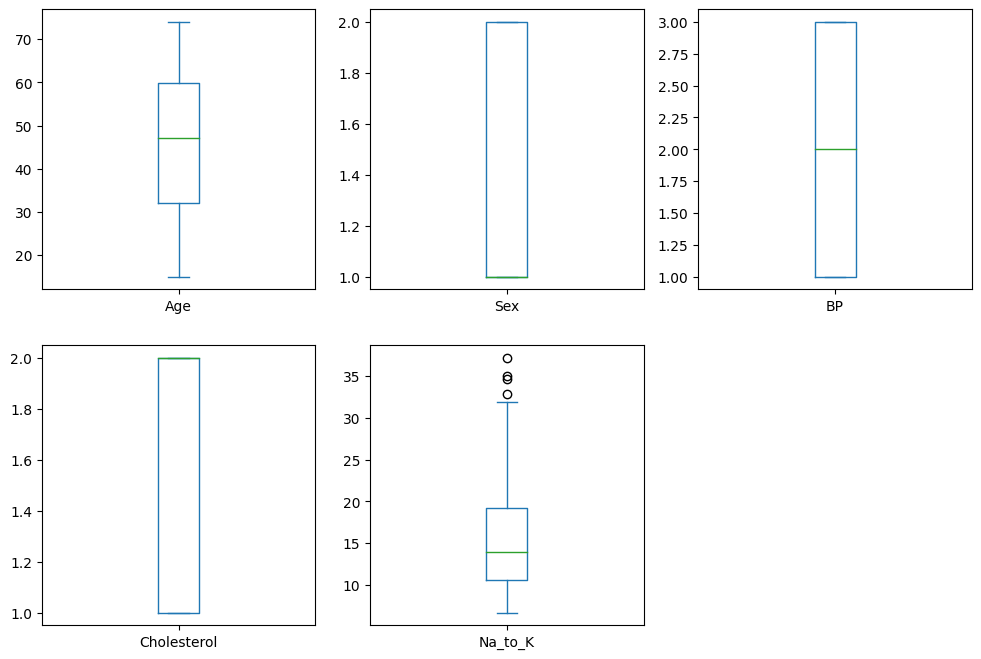

In [ ]:
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,8))
plt.show()

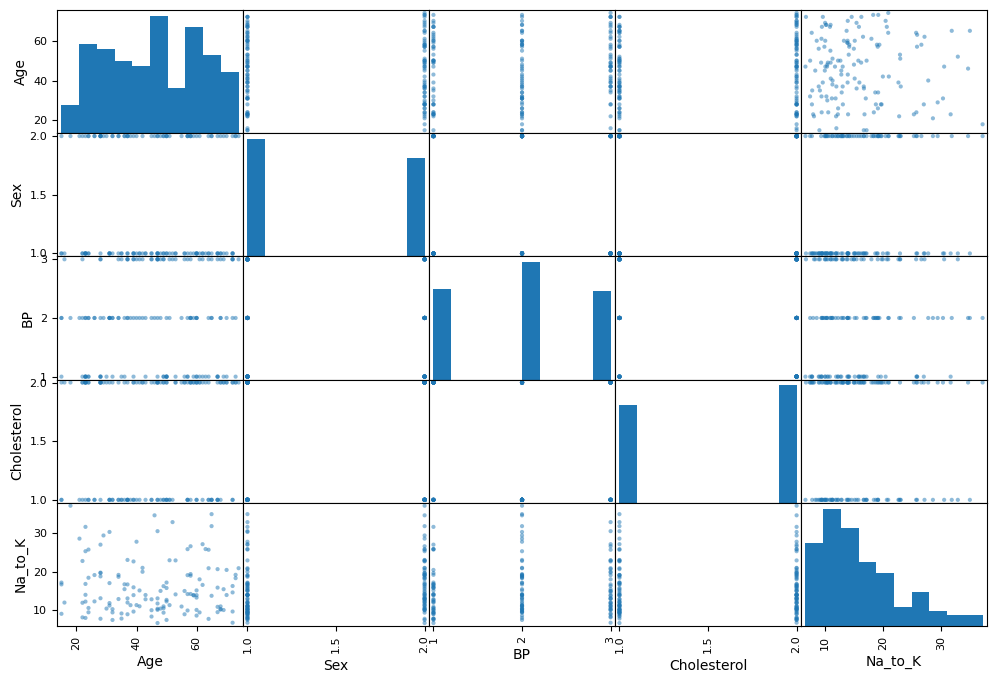

In [ ]:
scatter_matrix(X_train, figsize=(12,8))
plt.show()

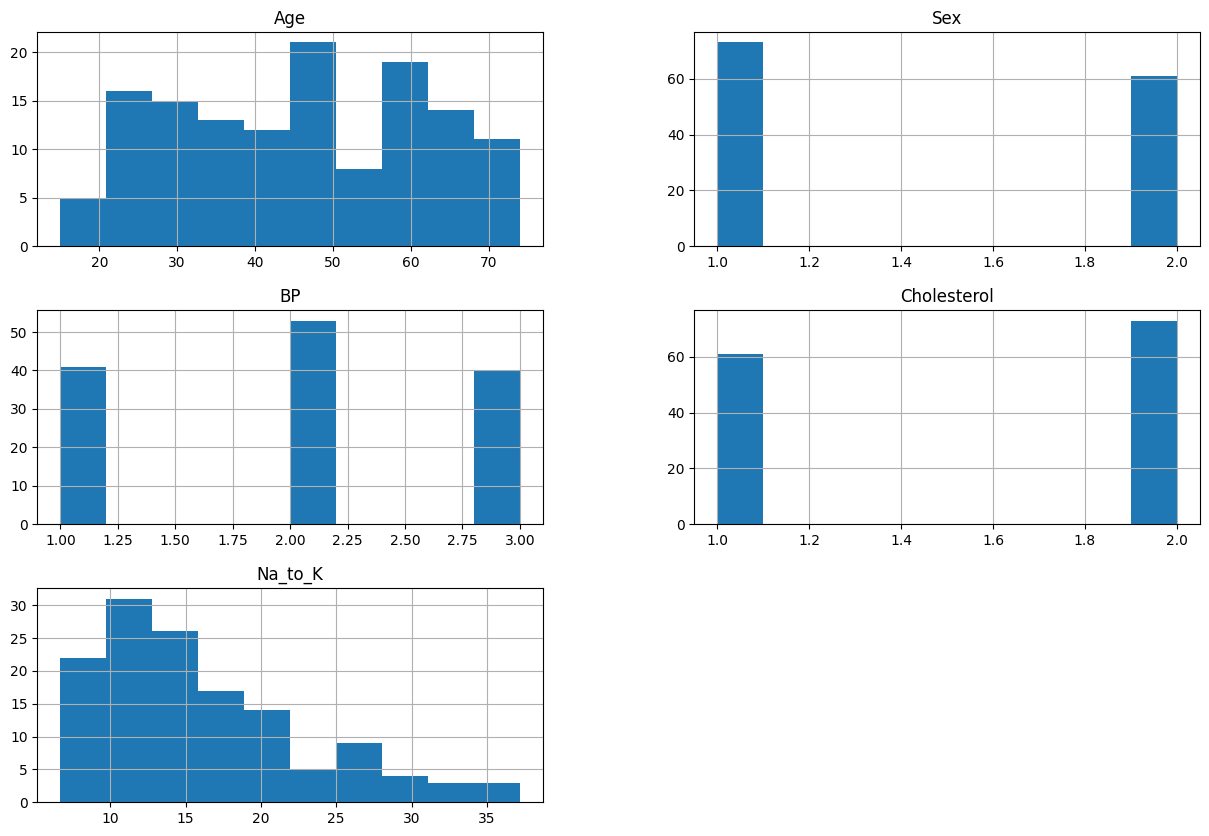

In [ ]:
X_train.hist(figsize=(15,10))
plt.show()

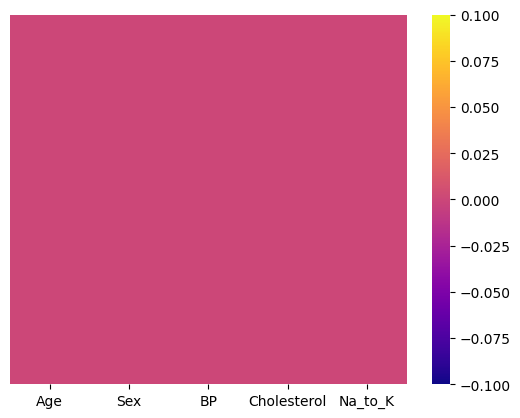

In [ ]:
sns.heatmap(X_train.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

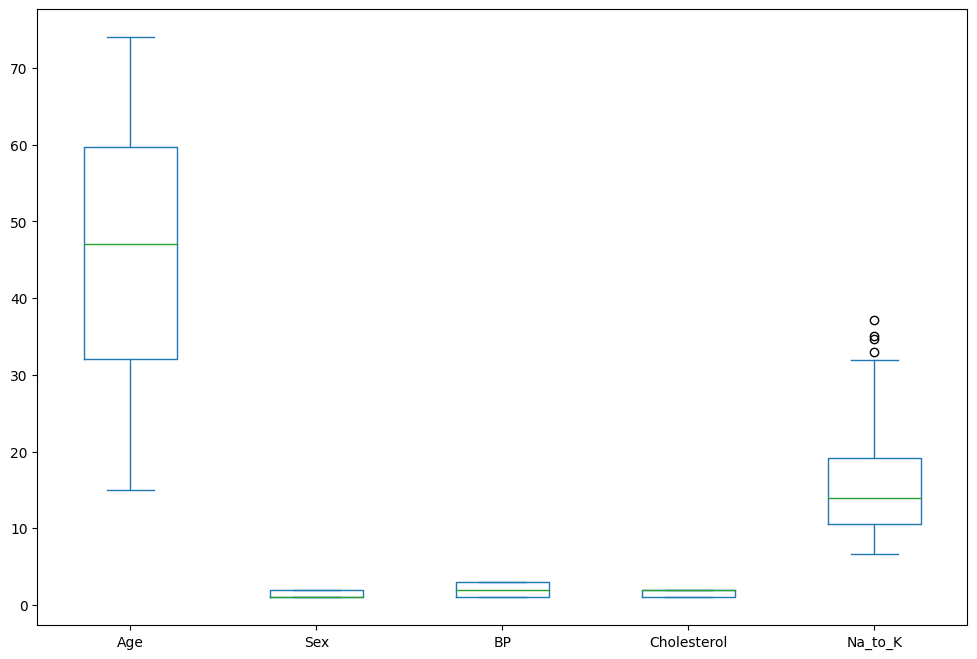

In [ ]:
sns.heatmap(X_train.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

#Data Preparaion

In [ ]:
X = data.drop(['Drug'], axis=1)
y = data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((134, 5), (66, 5))

In [ ]:
X_train.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,1,1,1,15.790
189,64,1,2,1,20.932
90,62,1,1,2,16.594
136,55,2,2,2,10.977
51,67,1,1,1,10.898


In [ ]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,3,1,11.424
15,16,2,2,1,15.516
30,18,2,1,1,8.750
158,59,2,3,2,10.444
128,47,1,3,1,33.542


#Modelling

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.8485
Training-set accuracy score: 0.8358


In [ ]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  0  0  7  1]
 [ 0  0  0  4  0]
 [ 0  0  0  5  1]
 [ 0  0  0 19  0]
 [ 0  0  0  0 29]]


In [ ]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_gini):
    print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini) * 100)
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_gini) * 100)

Gini Index Criterion is Better and it has accuracy equal to  84.84848484848484


#Visualisasi

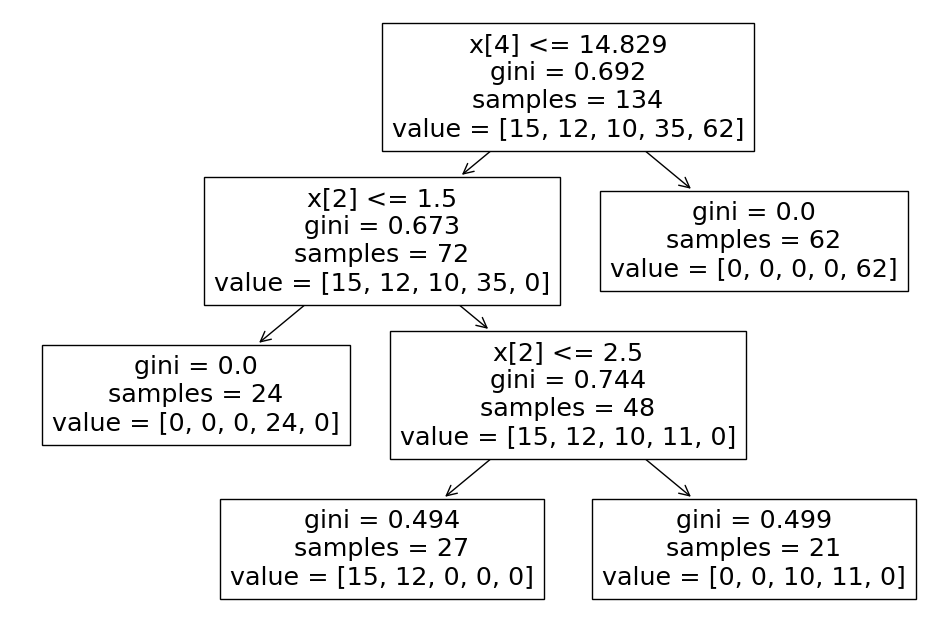

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

#Pickle

In [ ]:
filename = 'drug.sav'
pickle.dump(model.predict,open(filename,'wb'))